In [1]:
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import platform

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    mpl.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = mpl.font_manager.FontProperties(fname=path).get_name()
    mpl.rc('font', family=font_name)
else:
    print("Unknown System OS")

In [3]:
# 8. pandas 시각화
# (3) 원형그래프
df_tpop = pd.read_csv("data/20200521_202004_주민등록인구및세대현황.csv",
                      encoding="cp949", engine="python")
df_pro = df_tpop

In [4]:
print(df_tpop.shape)

(17, 7)


In [5]:
print(df_tpop.columns)

Index(['행정구역', '총인구수', '세대수', '세대당인구수', '남자인구수', '여자인구수', '남여비율'], dtype='object')


In [6]:
print(df_tpop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    17 non-null     object 
 1   총인구수    17 non-null     int64  
 2   세대수     17 non-null     int64  
 3   세대당인구수  17 non-null     float64
 4   남자인구수   17 non-null     int64  
 5   여자인구수   17 non-null     int64  
 6   남여비율    17 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.1+ KB
None


In [7]:
print(df_tpop.head())

    행정구역     총인구수      세대수  세대당인구수    남자인구수    여자인구수  남여비율
0  서울특별시  9726787  4361645    2.23  4737843  4988944  0.95
1  부산광역시  3408347  1507504    2.26  1671199  1737148  0.96
2  대구광역시  2431523  1041932    2.33  1200899  1230624  0.98
3  인천광역시  2950972  1246255    2.37  1478916  1472056  1.00
4  광주광역시  1456096   622374    2.34   720536   735560  0.98


In [8]:
print(df_tpop.tail())

       행정구역     총인구수      세대수  세대당인구수    남자인구수    여자인구수  남여비율
12     전라북도  1811619   821517    2.21   900628   910991  0.99
13     전라남도  1857083   877388    2.12   932970   924113  1.01
14     경상북도  2651054  1235801    2.15  1334981  1316073  1.01
15     경상남도  3353380  1461207    2.29  1688178  1665202  1.01
16  제주특별자치도   670595   295387    2.27   337119   333476  1.01


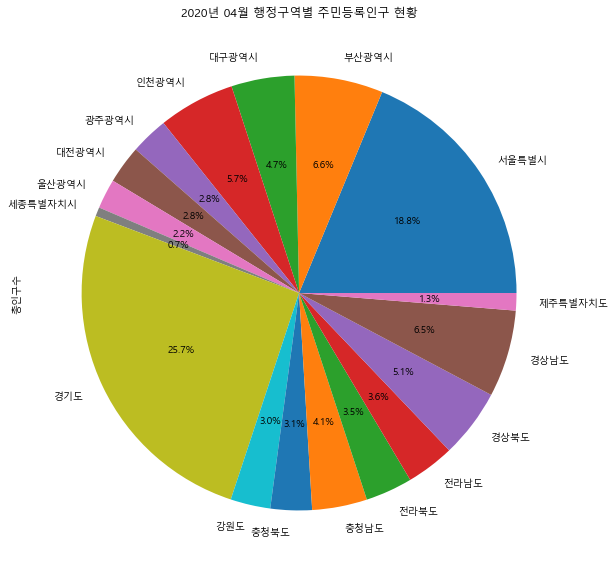

In [9]:
df_tpop.plot(kind='pie', y='총인구수', autopct='%1.1f%%',
             labels=df_tpop['행정구역'], legend=False, figsize=(10, 10))
plt.title('2020년 04월 행정구역별 주민등록인구 현황')
plt.savefig('plots/2020_04_행정구역별_주민등록인구_원형.png')
plt.show()
plt.close()

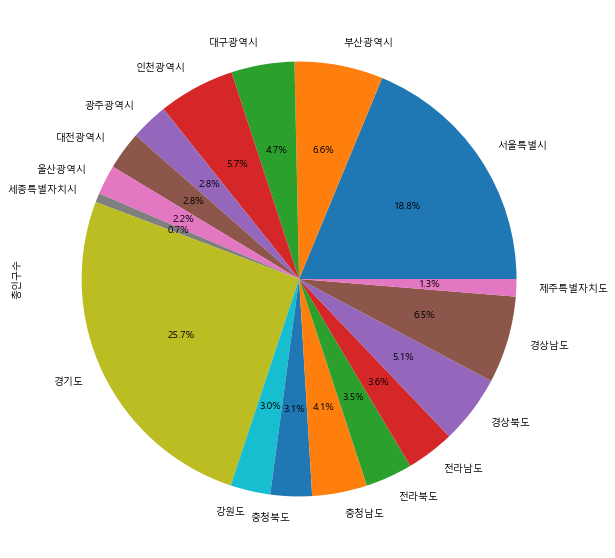

In [10]:
df_tpop.plot.pie(y='총인구수', autopct='%1.1f%%',
                 labels=df_tpop['행정구역'], legend=False, figsize=(10, 10))

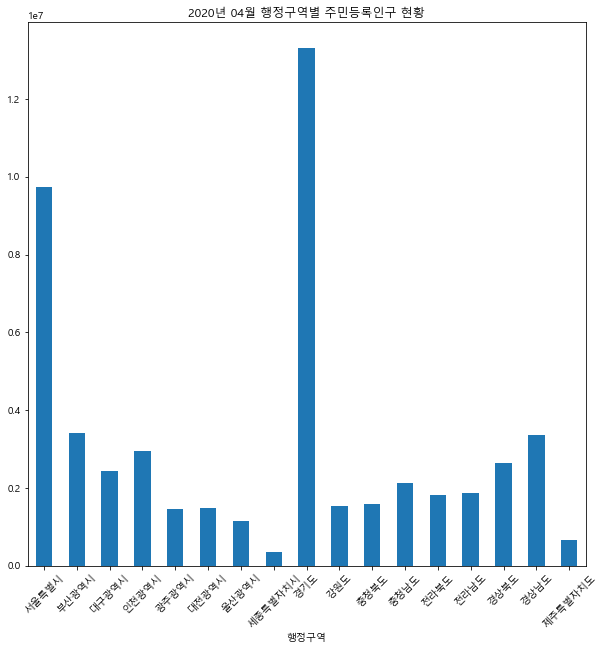

In [11]:
# (4) 막대 그래프

df_tpop.plot(kind='bar', x='행정구역', y='총인구수', rot=45, legend=False,
             figsize=(10, 10))
plt.title('2020년 04월 행정구역별 주민등록인구 현황')
plt.savefig('plots/2020_04_행정구역별_주민등록인구_막대.png')
plt.show()
plt.close()

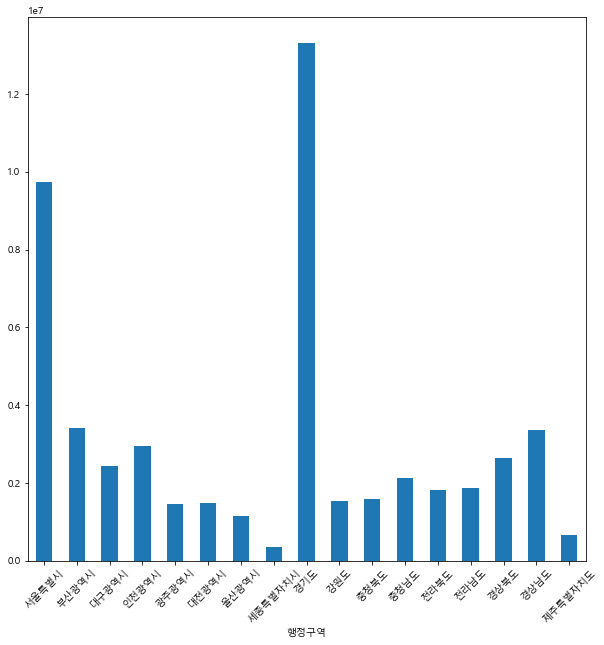

In [12]:
df_tpop.plot.bar(x='행정구역', y='총인구수', rot=45, legend=False,
                 figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BEB4D2148>,
      dtype=object)

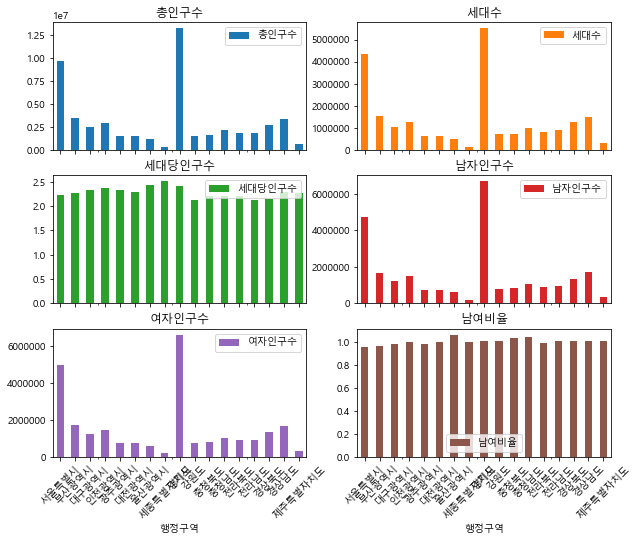

In [13]:
df_tpop.plot(kind='bar', x='행정구역', subplots=True, layout=(3, 2),
             rot=45, figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BEC277708>,
      dtype=object)

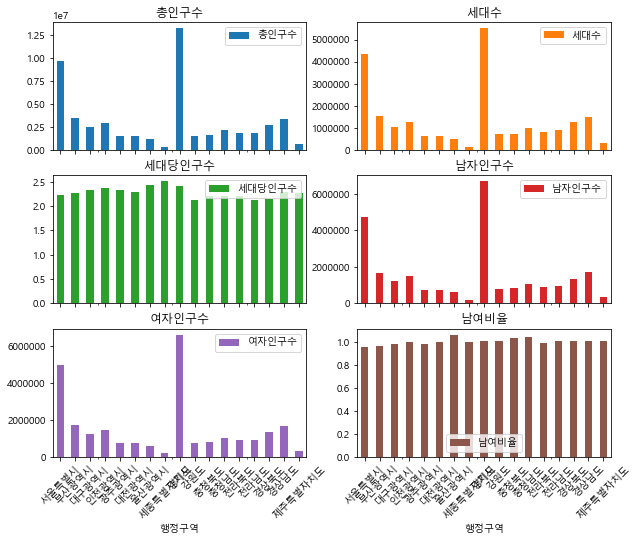

In [14]:
df_tpop.plot.bar(subplots=True, x='행정구역', layout=(3, 2),
                 rot=45, figsize=(10, 8))

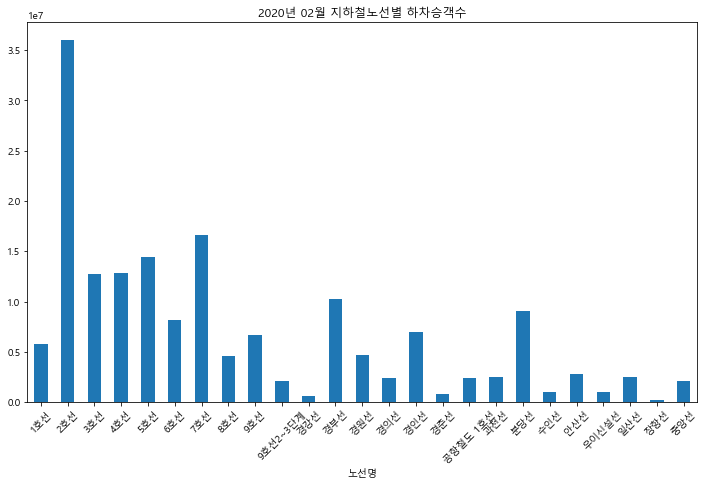

In [15]:
# 빈도 막대그래프
df_subway2 = pd.read_csv("data/20200423_202002_서울지하철승하차인원수.csv",
                         encoding='cp949', engine="python")
df_subway_groupby = df_subway2.groupby('노선명').sum()
df_subway_groupby['하차총승객수'].plot(kind='bar', rot=45, figsize=(12, 7))
plt.title('2020년 02월 지하철노선별 하차승객수')
plt.savefig('plots/2020_02_지하철노선별_하차승객수_막대.png')
plt.show()
plt.close()

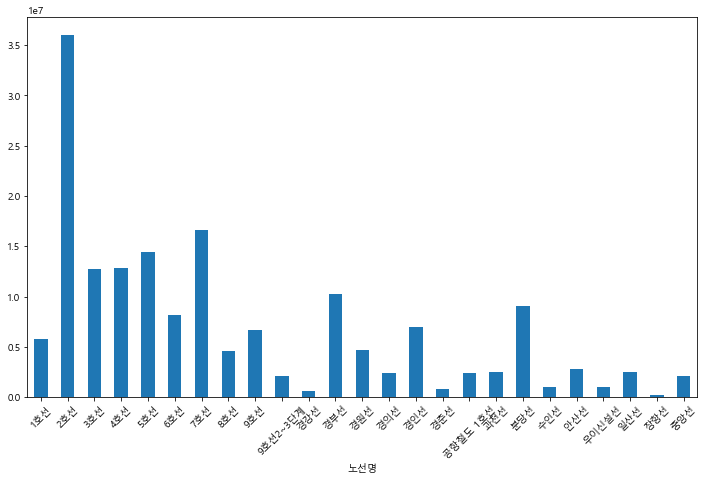

In [16]:
df_subway_groupby['하차총승객수'].plot.bar(rot=45, figsize=(12, 7))

In [17]:
# (5) 히스토그램
df_air = pd.read_csv("data/20200511_ghg.csv", encoding='cp949')
print(df_air.columns)
print(df_air.info())

Index(['지점', '시간', 'CO2_ppm', 'CH4_ppm', 'N2O_ppm', 'CFC11_ppm', 'CFC12_ppm',
       'CFC113_ppm', 'SF6_ppm'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          216 non-null    object 
 1   시간          216 non-null    object 
 2   CO2_ppm     216 non-null    float64
 3   CH4_ppm     185 non-null    float64
 4   N2O_ppm     150 non-null    float64
 5   CFC11_ppm   201 non-null    float64
 6   CFC12_ppm   200 non-null    float64
 7   CFC113_ppm  112 non-null    float64
 8   SF6_ppm     117 non-null    float64
dtypes: float64(7), object(2)
memory usage: 15.3+ KB
None


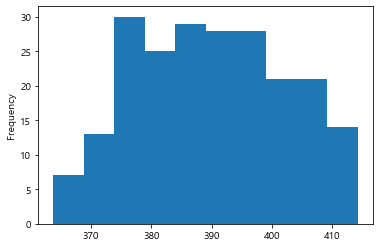

In [18]:
df_air['CO2_ppm'].plot(kind='hist')

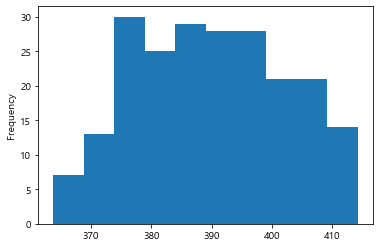

In [19]:
df_air['CO2_ppm'].plot.hist()

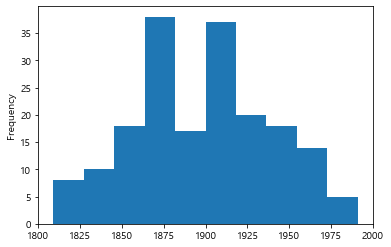

In [20]:
df_air['CH4_ppm'].plot(kind='hist')

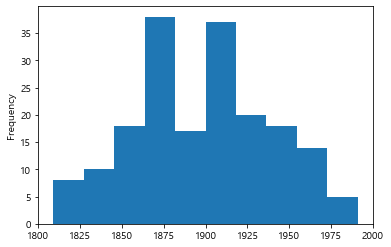

In [21]:
df_air['CH4_ppm'].plot.hist()

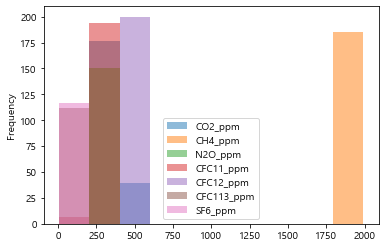

In [22]:
df_air.plot(kind='hist', alpha=0.5)

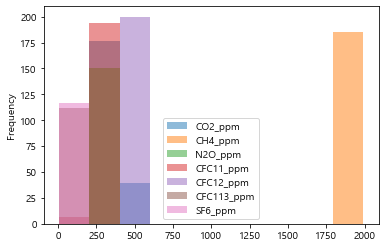

In [23]:
df_air.plot.hist(alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BECBB6988>,
      dtype=object)

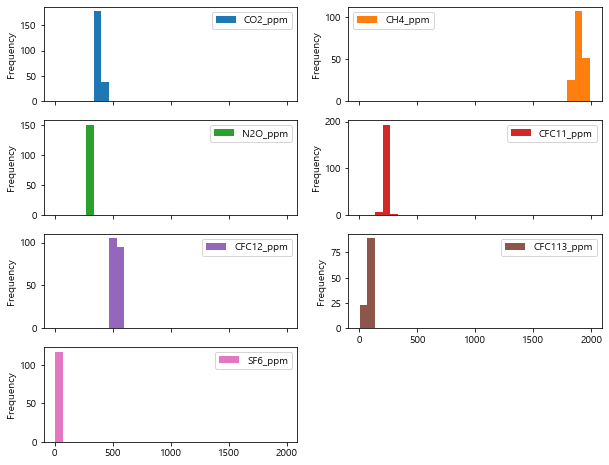

In [24]:
df_air.plot(kind='hist', bins=30, subplots=True,
            layout=(4, 2), figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BEEA412C8>,
      dtype=object)

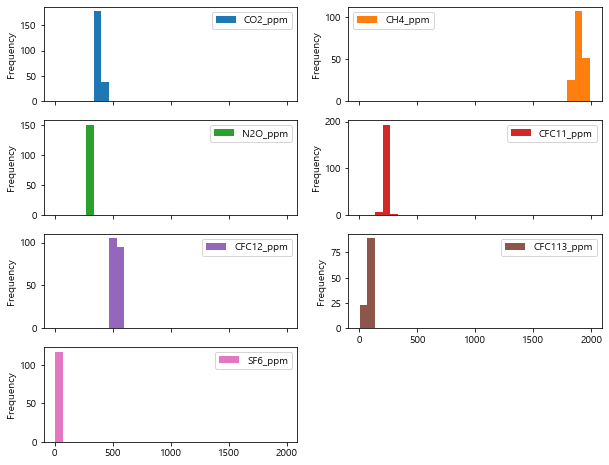

In [25]:
df_air.plot.hist(bins=30, subplots=True, layout=(4, 2), figsize=(10, 8))

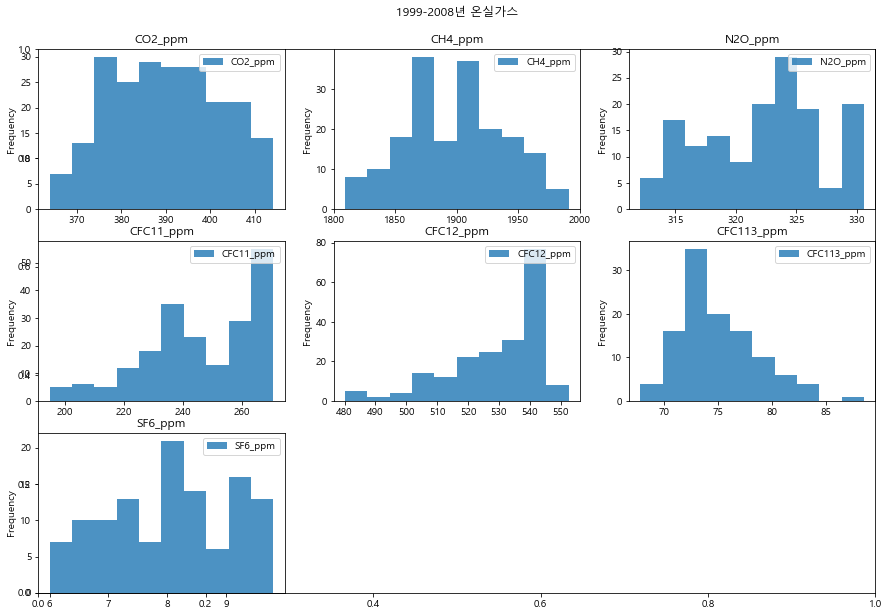

In [26]:
# 히스토그램 서브플롯별 축 분리
var1 = ['CO2_ppm', 'CH4_ppm', 'N2O_ppm', 'CFC11_ppm', 'CFC12_ppm',
       'CFC113_ppm', 'SF6_ppm']

i = 0

fig = plt.figure(figsize=(15, 10))
plt.title('1999-2008년 온실가스', y=1.05)
for v in var1:
    i += 1
    ax = fig.add_subplot(3, 3, i)
    ax.title.set_text(v)
    df_air[v].plot.hist(alpha=0.8)
    plt.legend(loc='upper right')
    #plt.suptitle(v)
plt.savefig('plots/1999-2008_온실가스.png')
plt.show()
plt.close()

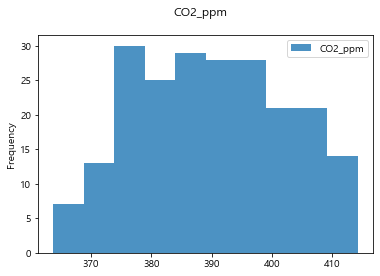

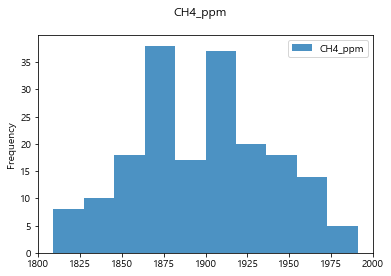

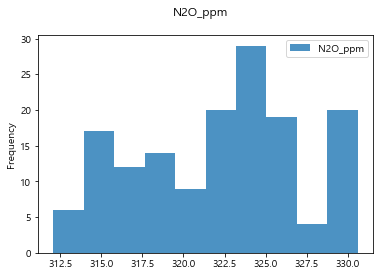

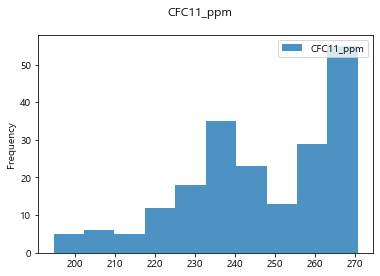

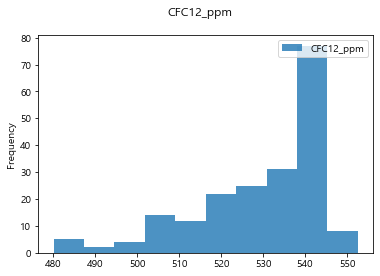

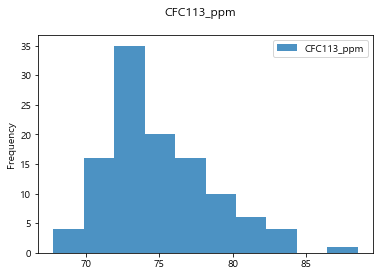

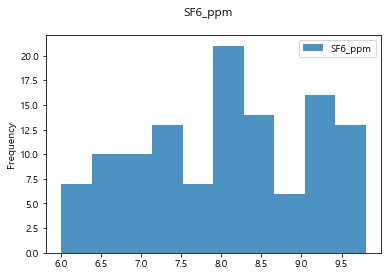

In [27]:
# 7개의 개별 히스토그램 생성
var1 = ['CO2_ppm', 'CH4_ppm', 'N2O_ppm', 'CFC11_ppm', 'CFC12_ppm',
       'CFC113_ppm', 'SF6_ppm']
for v in var1:
    df_air[v].plot(kind='hist', alpha=0.8)
    plt.legend(loc='upper right')
    plt.suptitle(v)
    plt.show()

plt.close()

In [28]:
# (6) 산점도, 산점도 행렬, 히트맵
# 1) 산점도(산포도)
df_ol = pd.read_excel('data/20180217_2017년서울시구별노령화지수.xlsx')
print(df_ol.columns)
print(df_ol.info())

Index(['기간', '자치구', '유년부양비', '노년부양비', '노령화지수'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      26 non-null     int64  
 1   자치구     26 non-null     object 
 2   유년부양비   26 non-null     float64
 3   노년부양비   26 non-null     float64
 4   노령화지수   26 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB
None


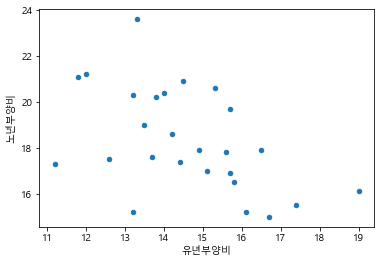

In [29]:
df_ol.plot(kind='scatter', x='유년부양비', y='노년부양비')

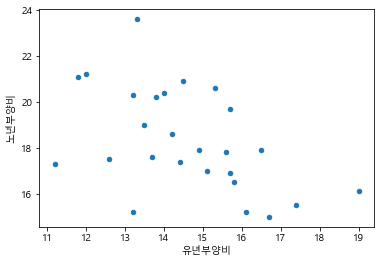

In [30]:
df_ol.plot.scatter(x='유년부양비', y='노년부양비')

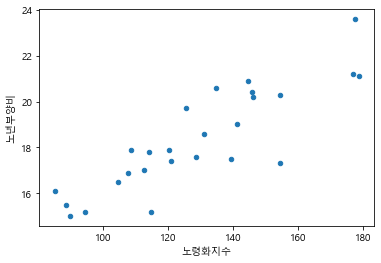

In [31]:
df_ol.plot(kind='scatter', x='노령화지수', y='노년부양비')

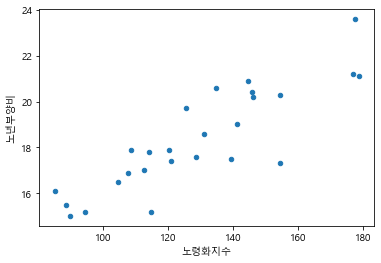

In [32]:
df_ol.plot.scatter(x='노령화지수', y='노년부양비')

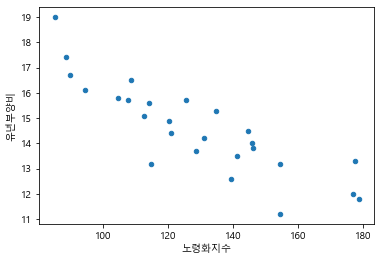

In [33]:
df_ol.plot(kind='scatter', x='노령화지수', y='유년부양비')

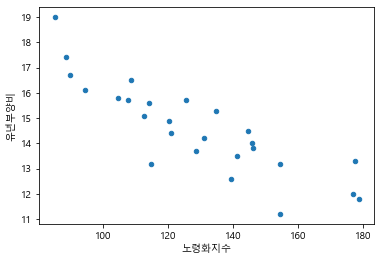

In [34]:
df_ol.plot.scatter(x='노령화지수', y='유년부양비')

In [35]:
# 상관관계
df_ol_p = df_ol[['자치구', '유년부양비', '노년부양비', '노령화지수']]

print(df_ol_p.corr())  # Pearson

          유년부양비     노년부양비     노령화지수
유년부양비  1.000000 -0.500293 -0.856468
노년부양비 -0.500293  1.000000  0.860372
노령화지수 -0.856468  0.860372  1.000000


In [36]:
print(df_ol_p.corr(method="spearman"))  # spearman

          유년부양비     노년부양비     노령화지수
유년부양비  1.000000 -0.505132 -0.869357
노년부양비 -0.505132  1.000000  0.827975
노령화지수 -0.869357  0.827975  1.000000


In [37]:
print(df_ol_p["노년부양비"].corr(df_ol_p["노령화지수"]))
print(df_ol_p["노년부양비"].corr(df_ol_p["노령화지수"], method="spearman"))

0.8603724677389147
0.8279754246178759


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BEF45D1C8>,
      dtype=object)

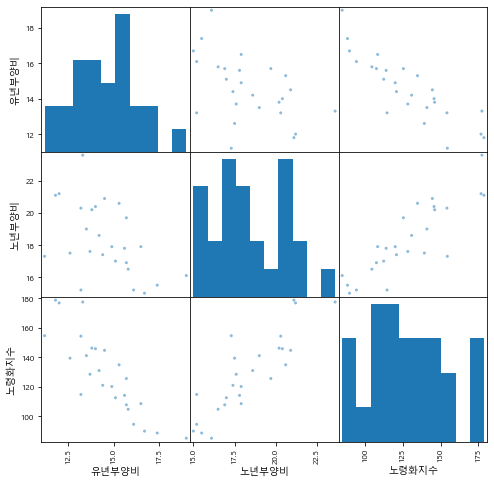

In [38]:
# 2) 산점도 행렬(산포행렬)
from pandas.plotting import scatter_matrix

scatter_matrix(df_ol_p, figsize=(8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BF1E28388>,
      dtype=object)

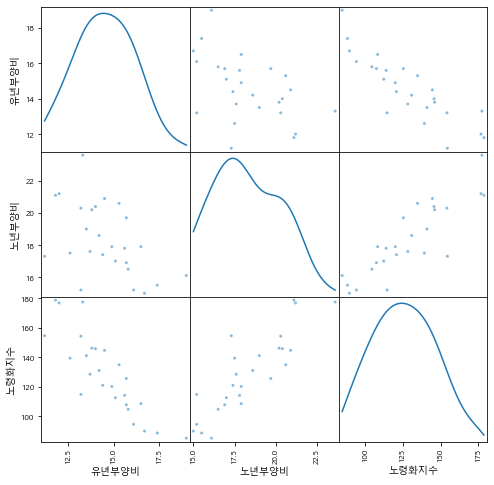

In [39]:
scatter_matrix(df_ol_p, diagonal='kde', figsize=(8, 8))

In [40]:
df_air = pd.read_csv("data/20200511_ghg.csv", encoding='cp949')
print(df_air.columns)

Index(['지점', '시간', 'CO2_ppm', 'CH4_ppm', 'N2O_ppm', 'CFC11_ppm', 'CFC12_ppm',
       'CFC113_ppm', 'SF6_ppm'],
      dtype='object')


In [41]:
print(df_air.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          216 non-null    object 
 1   시간          216 non-null    object 
 2   CO2_ppm     216 non-null    float64
 3   CH4_ppm     185 non-null    float64
 4   N2O_ppm     150 non-null    float64
 5   CFC11_ppm   201 non-null    float64
 6   CFC12_ppm   200 non-null    float64
 7   CFC113_ppm  112 non-null    float64
 8   SF6_ppm     117 non-null    float64
dtypes: float64(7), object(2)
memory usage: 15.3+ KB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BF1F7EC08>,
      dtype=object)

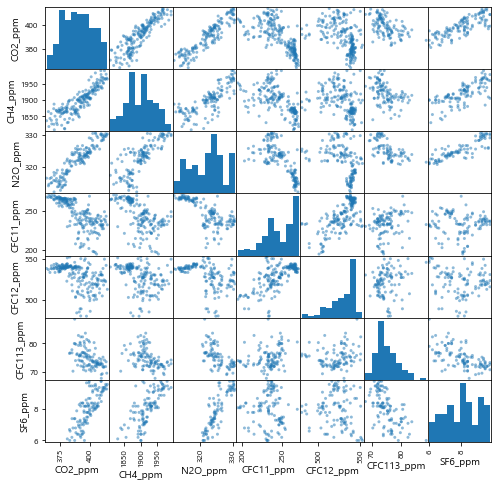

In [42]:
scatter_matrix(df_air, figsize=(8, 8))

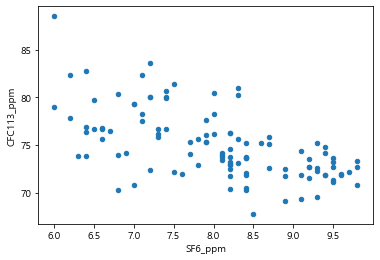

In [43]:
df_air.plot(kind='scatter', x='SF6_ppm', y='CFC113_ppm')

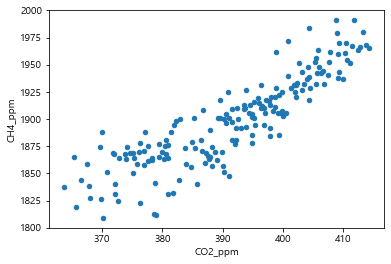

In [44]:
df_air.plot(kind='scatter', x='CO2_ppm', y='CH4_ppm')

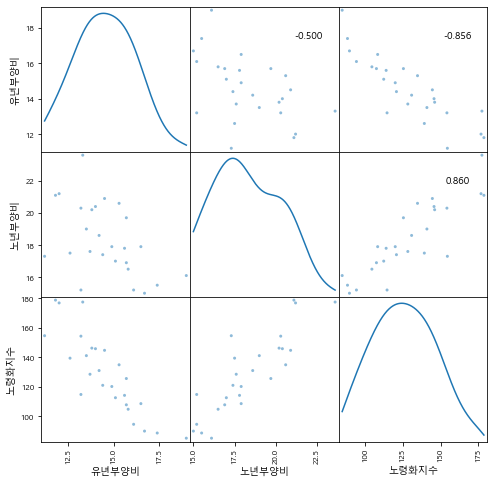

In [45]:
# 산점도 행렬에 상관계수 표시
from pandas.plotting import scatter_matrix

axes = scatter_matrix(df_ol_p, alpha=0.5, diagonal='kde', figsize=(8, 8))
corr = df_ol_p.corr().to_numpy()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" % corr[i, j], (0.8, 0.8),
          xycoords='axes fraction', ha='center', va='center')

plt.show()
plt.close()

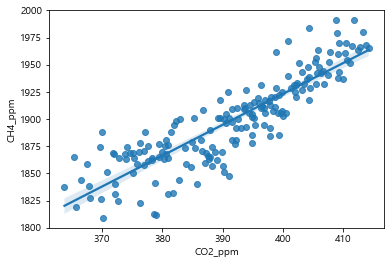

In [46]:
# seaborn을 사용한 산점도에 선형회귀 추가
import seaborn as sns
sns.regplot(x="CO2_ppm", y="CH4_ppm", data=df_air)

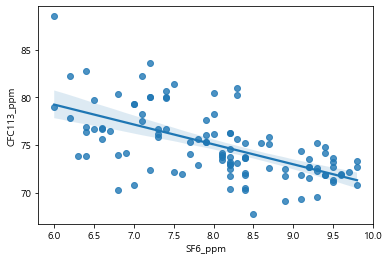

In [47]:
sns.regplot(x="SF6_ppm", y="CFC113_ppm", data=df_air)

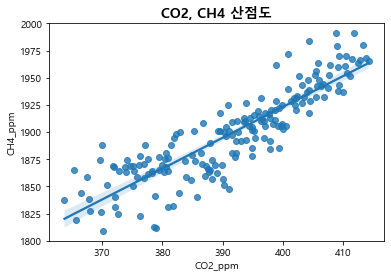

In [48]:
p1 = sns.regplot(x="CO2_ppm", y="CH4_ppm", data=df_air)

p1.set_title('CO2, CH4 산점도', fontsize=14, fontweight='bold')
plt.savefig("plots/regplot.png")

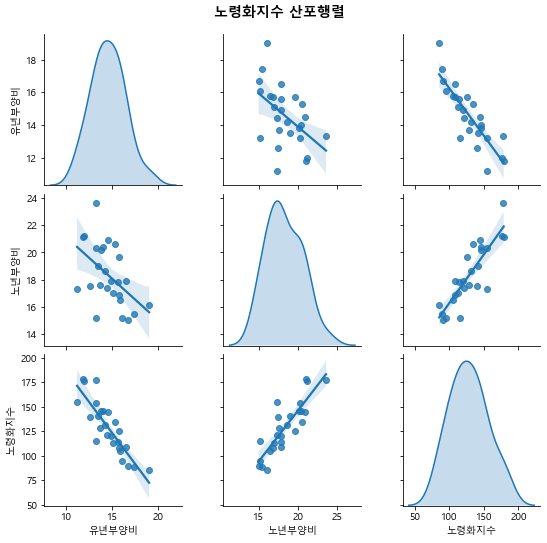

In [49]:
# seaborn을 사용한 산포행렬에 선형회귀 추가
import seaborn as sns

pp = sns.pairplot(df_ol_p,  # df[cols]
                  diag_kws=dict(shade=True),  # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde",  # use "kde" for diagonal plots
                  kind="reg")  # 산점도에 선형회귀(linear regression) 추가

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('노령화지수 산포행렬', fontsize=14, fontweight='bold')
fig.savefig("plots/pairplot.png")

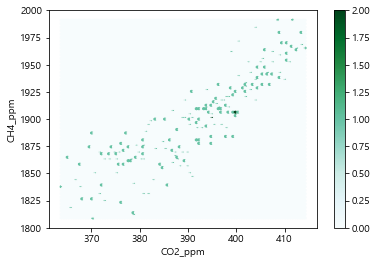

In [50]:
# 3) 히트맵(hexbin)
df_air.plot(kind="hexbin", x="CO2_ppm", y="CH4_ppm", sharex=False)

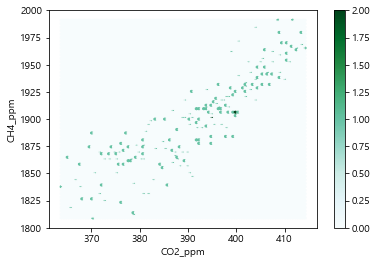

In [51]:
df_air.plot.hexbin(x="CO2_ppm", y="CH4_ppm", sharex=False)

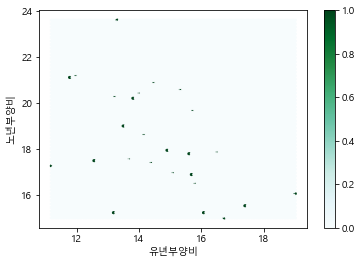

In [52]:
df_ol_p.plot(kind="hexbin", x="유년부양비", y="노년부양비", sharex=False)

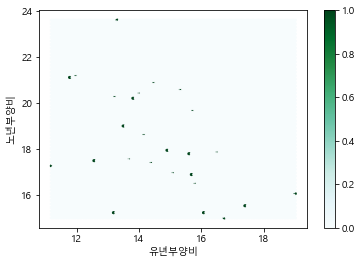

In [53]:
df_ol_p.plot.hexbin(x="유년부양비", y="노년부양비", sharex=False)

Text(0.5, 0.98, 'Green House gas Heatmap')

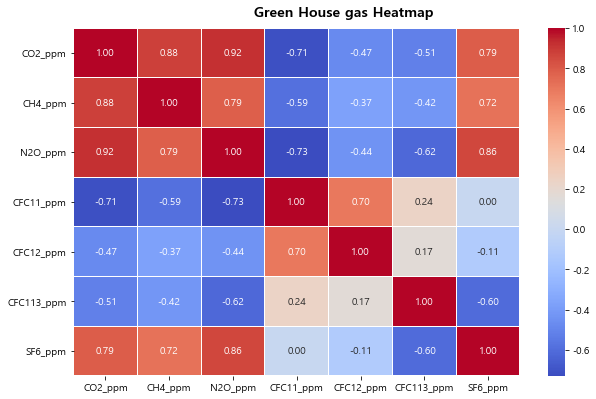

In [54]:
# seaborn을 사용한 히트맵
# 참고 https://jovianlin.io/data-visualization-seaborn-part-2/
import seaborn as sns

corr = df_air.corr()
fig, ax = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax, # 축설정
                 cmap="coolwarm", # 칼라 맵.
                 annot=True, # 셀안에 데이터값 표시
                 fmt='.2f',  # 셀안에 표시된 데이터값에 포맷팅 지정
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Green House gas Heatmap', 
              fontsize=14, 
              fontweight='bold')

In [55]:
#(7) 선그래프
print(df_air.columns)
print(df_air.info())

Index(['지점', '시간', 'CO2_ppm', 'CH4_ppm', 'N2O_ppm', 'CFC11_ppm', 'CFC12_ppm',
       'CFC113_ppm', 'SF6_ppm'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          216 non-null    object 
 1   시간          216 non-null    object 
 2   CO2_ppm     216 non-null    float64
 3   CH4_ppm     185 non-null    float64
 4   N2O_ppm     150 non-null    float64
 5   CFC11_ppm   201 non-null    float64
 6   CFC12_ppm   200 non-null    float64
 7   CFC113_ppm  112 non-null    float64
 8   SF6_ppm     117 non-null    float64
dtypes: float64(7), object(2)
memory usage: 15.3+ KB
None


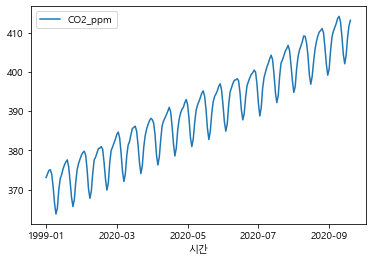

In [56]:
df_air.plot(kind="line", x="시간", y="CO2_ppm")

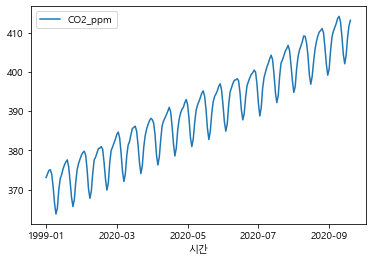

In [57]:
df_air.plot.line(x="시간", y="CO2_ppm")

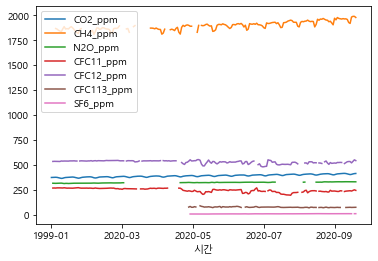

In [58]:
df_air.plot(kind="line", x="시간")

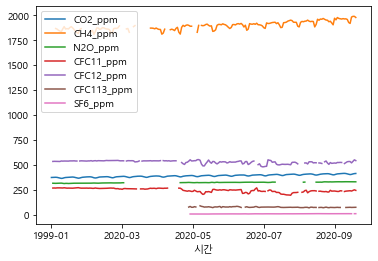

In [59]:
df_air.plot.line(x="시간")

Index(['지점', '일시', '평균오존전량(DU)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지점          31 non-null     int64 
 1   일시          31 non-null     object
 2   평균오존전량(DU)  31 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 872.0+ bytes
None


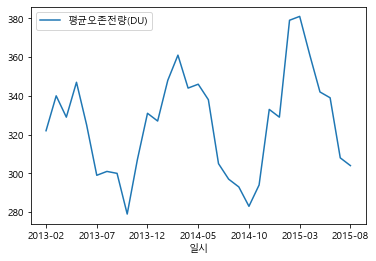

In [60]:
df_oz = pd.read_csv('data/ozone_data.csv', encoding="cp949")
print(df_oz.columns)
print(df_oz.info())
df_oz.plot.line(x="일시", y="평균오존전량(DU)")

In [61]:
# (8) 상자그림 그래프
df_subway2 = pd.read_csv("data/20200423_202002_서울지하철승하차인원수.csv",
                         encoding='cp949', engine="python")
df_sub = df_subway2
print(df_subway2.columns)
print(df_subway2.info())

Index(['노선명', '역ID', '역명', '승차총승객수', '하차총승객수'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17118 entries, 0 to 17117
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   노선명     17118 non-null  object
 1   역ID     17118 non-null  int64 
 2   역명      17118 non-null  object
 3   승차총승객수  17118 non-null  int64 
 4   하차총승객수  17118 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 668.8+ KB
None


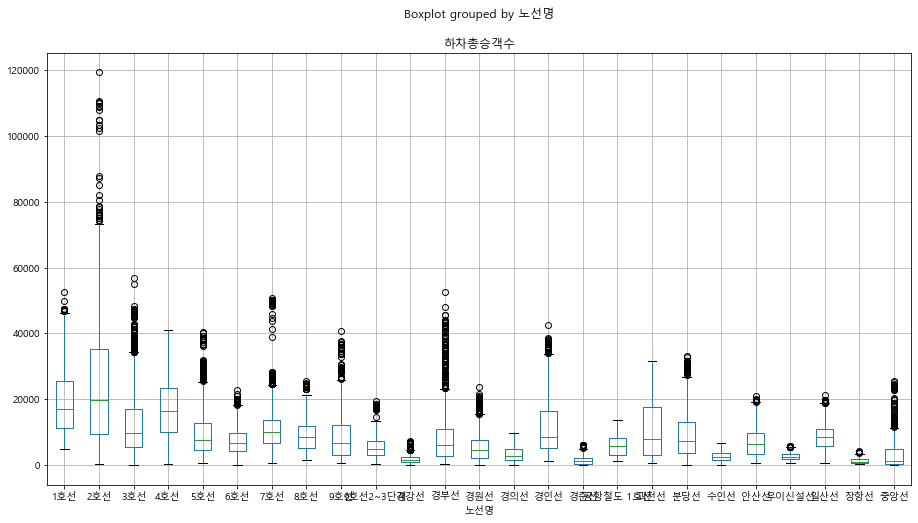

In [62]:
df_subway2.boxplot(by="노선명", column=['하차총승객수'], figsize=(15, 8))

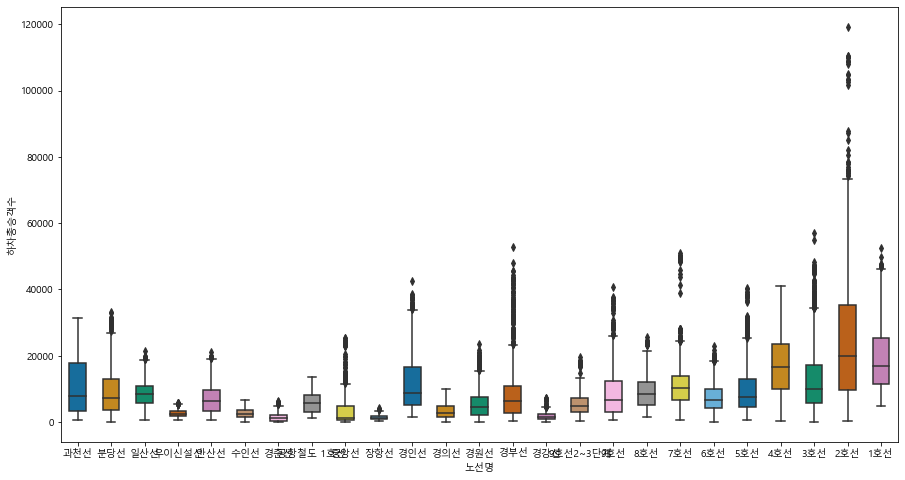

In [63]:
# seaborn을 사용한 상자그림
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y='하차총승객수', x='노선명', data=df_subway2, ax=ax,
            width=0.5, palette="colorblind")

In [64]:
cnd = ['1호선', '2호선', '3호선', '4호선']
print(df_subway2[df_subway2['노선명'].isin(['1호선', '2호선'])])

       노선명  역ID         역명  승차총승객수  하차총승객수
529    2호선  250  용두(동대문구청)    1733    1738
530    2호선  249      신정네거리    6892    6997
531    2호선  248       양천구청    4291    4446
532    2호선  247        도림천     782     770
533    2호선  246        신설동    3657    3629
...    ...  ...        ...     ...     ...
17113  1호선  154       종로5가   10105   10133
17114  1호선  153       종로3가   12134   11830
17115  1호선  152         종각   10605   10334
17116  1호선  151         시청    5990    5962
17117  1호선  150        서울역   14546   13815

[1740 rows x 5 columns]


In [65]:
df_subway2_p = df_subway2[df_subway2['노선명'].isin(cnd)]
print(df_subway2_p)

       노선명  역ID           역명  승차총승객수  하차총승객수
470    4호선  434          남태령    1079     693
471    4호선  433           사당   21990   20185
472    4호선  432    총신대입구(이수)   15650   16917
473    4호선  431      동작(현충원)    1555    1593
474    4호선  430  이촌(국립중앙박물관)    6097    6586
...    ...  ...          ...     ...     ...
17113  1호선  154         종로5가   10105   10133
17114  1호선  153         종로3가   12134   11830
17115  1호선  152           종각   10605   10334
17116  1호선  151           시청    5990    5962
17117  1호선  150          서울역   14546   13815

[3470 rows x 5 columns]


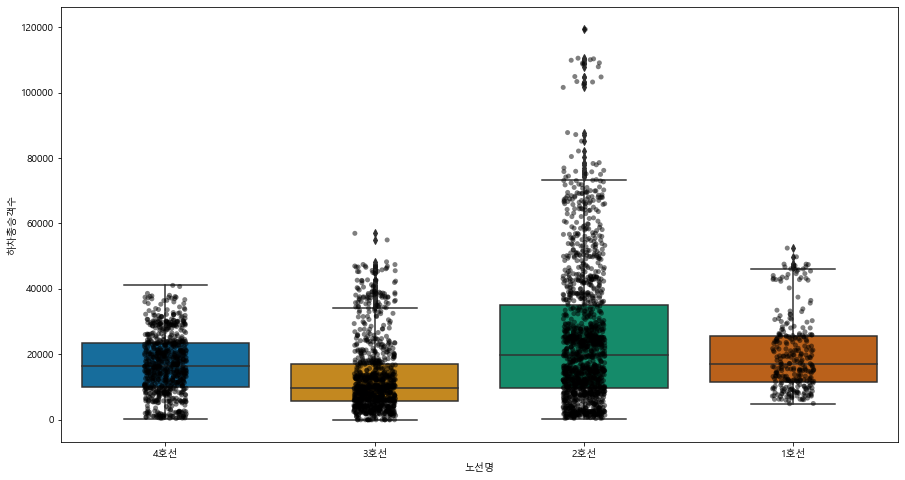

In [66]:
# seaborn을 사용한 상자그림에 산점도 추가 - stripplot
import numpy as np
np.random.seed(202005)

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y='하차총승객수', x='노선명', data=df_subway2_p, ax=ax,
            palette="colorblind")
sns.stripplot(y='하차총승객수', x='노선명', data=df_subway2_p, ax=ax,
              jitter=True, marker='o', alpha=0.5, color='black')

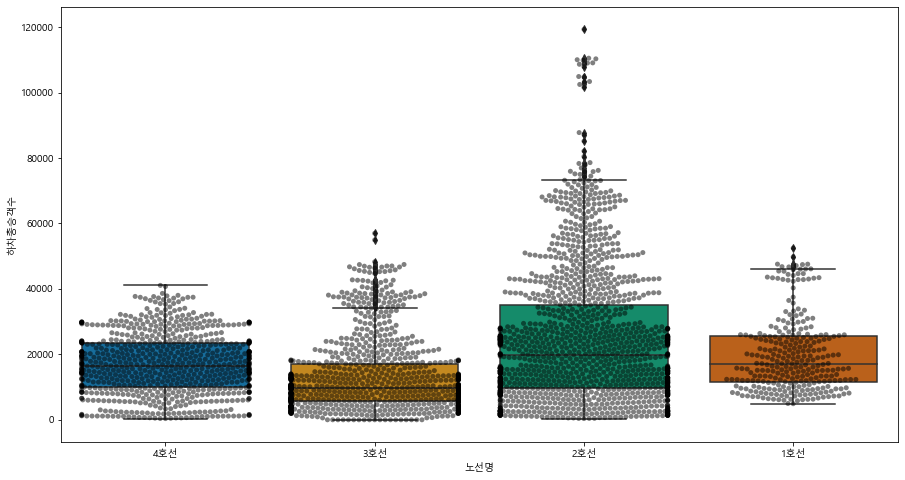

In [67]:
# seaborn을 사용한 상자그림에 산점도 추가 - swarmplot
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(y='하차총승객수', x='노선명', data=df_subway2_p, ax=ax,
            palette="colorblind")
sns.swarmplot(y='하차총승객수', x='노선명', data=df_subway2_p, ax=ax,
              alpha=0.5, color='black')